<a href="https://colab.research.google.com/gist/Ayush810/aec461d8a766bc5a8dfbfa0103bb29bf/student_marks_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation
## Task 1 (Tech-Intern)
## Prediction using Supervised ML

### Author- Tarun Tripathi

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# Dataset path
url="https://drive.google.com/file/d/1U3955Gao5hGhhmC0UclIVBjUPw__5GxL/view?usp=sharing"
file_id=url.split('/')[-2]
path='https://drive.google.com/uc?id=' + file_id
data=pd.read_csv(path) 
print(data.head())

   Study_Time  Percentage
0        7.75       79.50
1        7.90       80.76
2        8.19       83.08
3        6.55       76.03
4        6.36       76.04


# Discover and visulaize the data to gain insigths

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Study_Time  184 non-null    float64
 1   Percentage  188 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [4]:
data.describe()

,Study_Time,Percentage
count,184.000000,188.000000
mean,6.990109,77.901383
std,1.257771,4.952339
min,5.010000,68.570000
25%,5.757500,73.317500
50%,7.165000,77.640000
75%,8.082500,82.320000
max,8.970000,86.990000


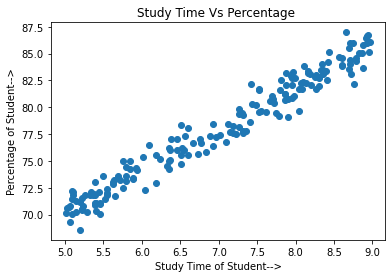

In [5]:
plt.scatter(x=data.Study_Time,y=data.Percentage)
plt.xlabel("Study Time of Student-->")
plt.ylabel("Percentage of Student-->")
plt.title("Study Time Vs Percentage ")
plt.show()

# Prepare The Data For Machine Learning Algorithm 

In [6]:
# Data Cleaning 
data.isnull().sum()

Study_Time    4
Percentage    0
dtype: int64

In [7]:
data.mean()

Study_Time     6.990109
Percentage    77.901383
dtype: float64

In [8]:
data2=data.fillna(data.mean())

In [9]:
 data2.isnull().sum()

Study_Time    0
Percentage    0
dtype: int64

In [10]:
data2.head()

,Study_Time,Percentage
0,7.75,79.50
1,7.90,80.76
2,8.19,83.08
3,6.55,76.03
4,6.36,76.04


In [11]:
# split dataset for training
x=data2.drop("Percentage", axis="columns")
y=data2.drop("Study_Time",axis="columns")
print("shape of x",x.shape)
print("shape of y", y.shape)



shape of x (188, 1)
shape of y (188, 1)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=51) # tes_size is defining how much data we want for testing so 0.2 means i am using 20 percent data for testing 

In [13]:
print("shape of X Train",X_train.shape)
print("shape of Y Train",Y_train.shape)
print("shape of X Test", X_test.shape)
print("shape of Y Test",Y_test.shape)


shape of X Train (150, 1)
shape of Y Train (150, 1)
shape of X Test (38, 1)
shape of Y Test (38, 1)


# Select a model and train it

In [14]:
# So in above scatter plot as we saw that when the value of x is increasing the value of y is also increasing in a linear format so we can use linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [15]:
lr.fit(X_train,Y_train)

LinearRegression()

In [16]:
lr.coef_

array([[3.87848311]])

In [17]:
lr.intercept_

array([50.82449139])

In [18]:
 m= 3.93
 c= 50.44
 y= m*12+c
 y

97.6

In [19]:
lr.predict([[4]])[0][0].round(2)

66.34

In [20]:
y_pred=lr.predict(X_test)
y_pred

array([[80.57245683],
       [78.36172146],
       [70.41083109],
       [80.68881133],
       [84.87757309],
       [72.31128781],
       [70.25569176],
       [83.01590119],
       [75.49164396],
       [85.49813038],
       [71.72951535],
       [82.16263491],
       [81.65843211],
       [76.07341643],
       [71.65194568],
       [77.6635945 ],
       [84.80000342],
       [83.48131917],
       [75.87949227],
       [79.99068437],
       [70.99260356],
       [81.69721694],
       [76.65518889],
       [74.25052937],
       [85.45934555],
       [79.60283606],
       [77.85751866],
       [76.11220126],
       [71.69073052],
       [82.86076187],
       [75.45285913],
       [77.50845518],
       [85.22663657],
       [75.02622599],
       [79.17620292],
       [77.31453102],
       [77.93550989],
       [82.20141974]])

In [21]:
pd.DataFrame(np.c_[X_test,Y_test,y_pred], columns=["Study_Time","Original_Percentage","Predicted_Percentage"])

,Study_Time,Original_Percentage,Predicted_Percentage
0,7.670000,80.58,80.572457
1,7.100000,76.76,78.361721
2,5.050000,70.67,70.410831
3,7.700000,80.81,80.688811
4,8.780000,84.35,84.877573
5,5.540000,72.38,72.311288
6,5.010000,70.11,70.255692
7,8.300000,82.84,83.015901
8,6.360000,76.04,75.491644
9,8.940000,86.75,85.498130


# Fine Tuning The modle

In [22]:
lr.score(X_test,Y_test) # so our model is giving the accuracy of 95.14% 

0.9479083610905108

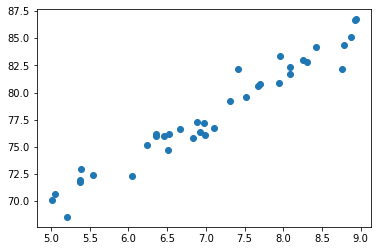

In [23]:
plt.scatter(X_test,Y_test)

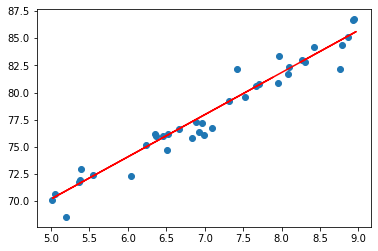

In [24]:
plt.scatter(X_test,Y_test)
plt.plot(X_train,lr.predict(X_train),color="red")

# Present Your Solution

In [25]:
import joblib
joblib.dump(lr,"Student_Marks_Predictor.pkl")

['Student_Marks_Predictor.pkl']

In [26]:
model=joblib.load("Student_Marks_Predictor.pkl")

In [27]:
model.predict([[5]])

array([[70.21690693]])